# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 4
# Stochastic Gradient Descent

**Objectives:** Here we will use Stochastic Gradient Descent Method in which every next point is chosen randomly.

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
import matplotlib.pyplot as plt
import random
import time

### Read the data

In [2]:
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
l = data['l'].values
t = data['t'].values
tsq = t * t

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

$y = mx + c$

$E$ = $(y_i - y)^2$

$\frac{\partial E }{\partial m}$ = $ -(y_i - (mx_i + c)) * x_i$

$\frac{\partial E }{\partial c}$ = $ -(y_i - (mx_i + c))$

In [4]:
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

## TRAIN

In [5]:
# Init m, c
m, c = 0, 0

In [6]:
# Learning rate
lr = 0.001

<IPython.core.display.Javascript object>


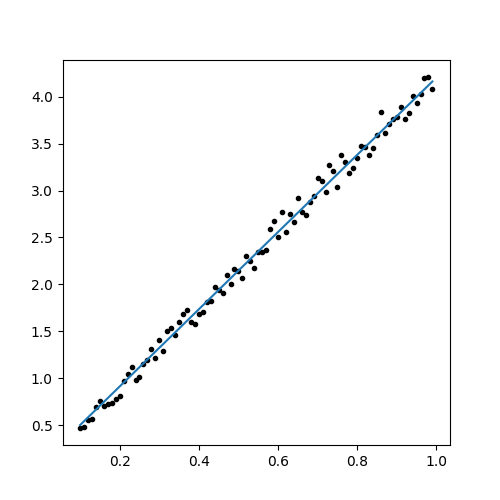

m = 2.2012 c = 1.18813 Error = 8.81577e-06
m = 2.9203 c = 0.77542 Error = 5.39416e-05
m = 3.37251 c = 0.514897 Error = 1.07464e-05
m = 3.65751 c = 0.351494 Error = 0.00104352
m = 3.83689 c = 0.248601 Error = 0.0496985
m = 3.94973 c = 0.183727 Error = 0.00618947
m = 4.02074 c = 0.142839 Error = 0.00745266
m = 4.06552 c = 0.11727 Error = 0.000723721
m = 4.09365 c = 0.101069 Error = 0.016377
m = 4.11141 c = 0.0909376 Error = 0.0276727


In [7]:
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

**Exercise: Experiment with other lr values.**

## Plotting error vs iterations

<IPython.core.display.Javascript object>


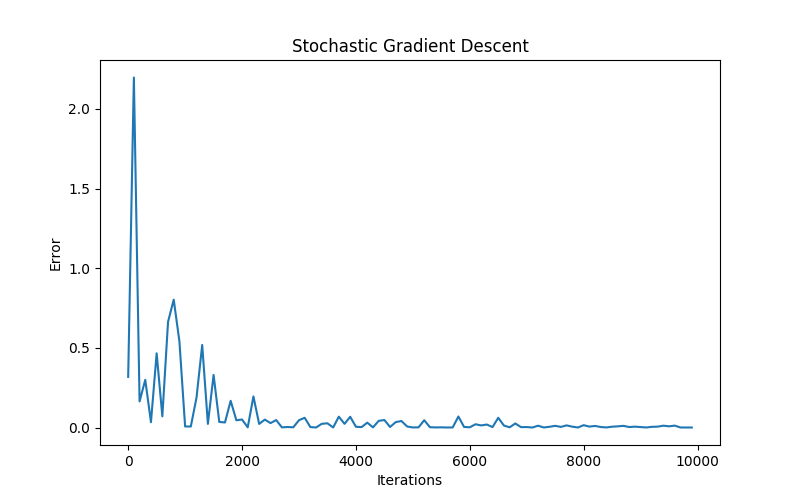

In [8]:
ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.0001
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the value of for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
epochs = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epochs, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Stochastic Gradient Descent")
plt.show()

**Exercise: Is this better than sequential gradient descent and vanilla gradient descent?**

Hint - check the error value at saturation, and time it takes to reach saturation.

.0004 for 10k iterations, is definitely better than both Sequential and Vanilla GDs and much quicker as well!

## PROBLEM

Problem with Sequential Gradient Descent is it does not scale well - it makes the same calculation of gradient descent on each sample sequentially. So the time taken will increase linearly with the number of samples. Many datasets have samples in the range of millions. Hence, even though it gives good results, it is not ideal.

We need a gradient descent formulation that gives the speed of vanilla gradient descent and the accuracy of sequential/stochastic gradient descent.

Next up - **Minibatch Gradient Descent!**

In [ ]:
#### Last Error at saturation: 0.004